<a href="https://colab.research.google.com/github/yaminipriyakodeboyina/Artificial_Intelligence_miniprojects/blob/master/deeplab_resnet50_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
import torchvision
import os
from scipy.io import loadmat
from sklearn.model_selection import StratifiedShuffleSplit
import collections
import numpy as np
from torch.utils.data import Dataset,DataLoader
from torchvision.models.segmentation import fcn_resnet50
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision.models.segmentation import deeplabv3_resnet50
from torchvision.models.segmentation.deeplabv3 import DeepLabHead


In [2]:
# # specifying the zip file name
# file_name = "underwater_sem_seg.zip"
# #
# # # opening the zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()

#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')


In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.listdir("drive/MyDrive")

Mounted at /content/drive


['Indiana University Fee Analysis 2020-2021 Cycle March 2021.gsheet',
 'Resume_Yamini.pdf',
 'Untitled presentation.gslides',
 'Colab Notebooks']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# # specifying the zip file name
# file_name = "underwater_sem_seg.zip"
# #
# # # opening the zip file in READ mode
# with ZipFile("drive/MyDrive/underwater_sem_seg.zip", 'r') as zip:
#     # printing all the contents of the zip file
#     # zip.printdir()

#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')

In [6]:
root = "drive/MyDrive/Colab Notebooks/dataset"

entries = os.listdir(root)
# entries.remove("indices_files")
entries.remove('.DS_Store')
print(entries)
print(entries)
folders = [root+"/"+i for i in entries[1:]]
print(folders)
# entries = os.listdir(folders[0])
# print(entries)
images = []
masks = []
imclasses = []
for folder in folders:
    entries = os.listdir(folder)
    for image_data in entries:
#         print(folder+"/"+image_data)
        mat = loadmat(folder+"/"+image_data)
        # print(mat)
        images.append(np.asarray(mat["image_array"]))
        imclasses.append(mat["class"])
        masks.append(np.asarray(mat["mask_array"]))
        # images.append((imclass,image,mask_array))
    # break


['squid_sem_seg_gt', 'whale_sem_seg_gt', 'star_fish_sem_seg_gt', 'nudibranch_sem_seg_gt', 'sea_urchin_sem_seg_gt', 'stingray_sem_seg_gt', 'dolphin_sem_seg_gt', 'crocodile_sem_seg_gt', 'shark_sem_seg_gt', 'otter_sem_seg_gt', 'seal_sem_seg_gt', 'frog_sem_seg_gt', 'turtle_sem_seg_gt', 'seahorse_sem_seg_gt', 'nettles_sem_seg_gt', 'penguin_sem_seg_gt', 'polar_bear_sem_seg_gt', 'octopus_sem_seg_gt', 'sea_anemone_sem_seg_gt', 'crab_sem_seg_gt', 'shrimp_sem_seg_gt']
['squid_sem_seg_gt', 'whale_sem_seg_gt', 'star_fish_sem_seg_gt', 'nudibranch_sem_seg_gt', 'sea_urchin_sem_seg_gt', 'stingray_sem_seg_gt', 'dolphin_sem_seg_gt', 'crocodile_sem_seg_gt', 'shark_sem_seg_gt', 'otter_sem_seg_gt', 'seal_sem_seg_gt', 'frog_sem_seg_gt', 'turtle_sem_seg_gt', 'seahorse_sem_seg_gt', 'nettles_sem_seg_gt', 'penguin_sem_seg_gt', 'polar_bear_sem_seg_gt', 'octopus_sem_seg_gt', 'sea_anemone_sem_seg_gt', 'crab_sem_seg_gt', 'shrimp_sem_seg_gt']
['drive/MyDrive/Colab Notebooks/dataset/whale_sem_seg_gt', 'drive/MyDrive/

In [7]:
randn = list(np.random.randint(low = 0,high=544,size=200))
for i in randn:
  im = images[i]
  target = masks[i]
  class_ = imclasses[i]
  imclasses.append(class_)
  # perform horizontal flip
  images.append(np.fliplr(im))
  masks.append(np.fliplr(target))

#shift right
randn = list(np.random.randint(low = 0,high=544,size=100))
for i in randn:
  shift = 20
  im = images[i]
  target = masks[i]
  class_ = imclasses[i]
  imclasses.append(class_)

  im[:, shift:] = im[:, :-shift]
  target[:, shift:] = target[:, :-shift]
  images.append(im)
  masks.append(target)


#shift left
randn = list(np.random.randint(low = 0,high=544,size=100))
for i in randn:
  shift = 20
  im = images[i]
  target = masks[i]
  class_ = imclasses[i]
  imclasses.append(class_)

  im[:, :-shift] = im[:, shift:]
  target[:, :-shift]= target[:, shift:]
  images.append(im)
  masks.append(target)


#shift up
randn = list(np.random.randint(low = 0,high=544,size=100))
for i in randn:
  shift = 20
  im = images[i]
  target = masks[i]
  class_ = imclasses[i]
  imclasses.append(class_)

  im[:-shift, :] = im[shift:, :]
  target[:-shift, :] = target[shift:, :]
  images.append(im)
  masks.append(target)


#shift down
randn = list(np.random.randint(low = 0,high=544,size=100))
for i in randn:
  shift = 20
  im = images[i]
  target = masks[i]
  class_ = imclasses[i]
  imclasses.append(class_)

  im[shift:, :] = im[:-shift,:]
  target[shift:, :] = target[:-shift,:]
  images.append(im)
  masks.append(target)


In [8]:

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1)

for train_index, test_index in split.split(images,imclasses):
    print(train_index,test_index)
    images_train = [images[i] for i in train_index]
    classes_train = [imclasses[i] for i in train_index]
    masks_train = [masks[i] for i in train_index]

    images_test = [images[i] for i in test_index]
    classes_test = [imclasses[i] for i in test_index]
    masks_test = [masks[i] for i in test_index]

print(len(images_train),len(images_test))

[ 832  339  839 ...  720  346 1027] [ 108  472  743 1098  593 1028   27 1120 1111  583 1064  779 1107  648
   32 1089  231  719  503  193 1087  168  523   24  840 1117  732  617
 1114  672  364 1127  452  662  122  268  467  632  213  359  466  477
  300 1103  864   40  139  447  294  571  963  398  496   96  696  234
  366  221  533   83  407   51  162  133  556  531  679  417  287  302
  752  932   73  546  150  147 1007  669  226  178  959  341  577  305
  196   65  227   15   34 1143 1109  905  390    1  277  246  344   41
  907  518  237  954  373  900  774 1133  282  816  430  434  730   47
 1140  342  112]
1030 115


In [9]:
class myDataset(Dataset):
    def __init__(self,input_data,mask,transform, transform_label):
        self.input=input_data
        self.mask = mask
        self.transforms = transform
        self.transforms_label = transform_label


    def __len__(self):
        return len(self.input)

    def __getitem__(self, index):
        x=self.input[index]
        z=self.mask[index]
#         print(x,z)
        if self.transforms is not None:
            # apply the transformations to both image and its mask
            x = self.transforms(x)
            z = self.transforms_label(z)
            z = torch.tensor(np.asarray(z))
            z[z == 31] = 0
        return x,z

class hyperparam:
    num_classes=31
    num_workers=5
    bs=20
    epochs = 150
    HEIGHT= 256
    WIDTH = 256
# params = {shuffle=True,"batch_size" : hyperparam.bs, "num_workers":num_workers=os.cpu_count() ,"pin_memory" : False}


In [10]:
from torchvision import transforms
import torchvision.transforms.functional as F
from torchvision.transforms import InterpolationMode as interpolate

transforms_image = transforms.Compose([transforms.ToPILImage(),transforms.Resize((hyperparam.HEIGHT,hyperparam.WIDTH)),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])
transforms_label = transforms.Compose([transforms.ToPILImage(),transforms.Resize((256,256), interpolate.NEAREST)])
#transforms.Resize((hyperparam.HEIGHT,hyperparam.WIDTH)),transforms.CenterCrop(256),
training_set = myDataset(images_train,masks_train,transforms_image,transforms_label)
test_set = myDataset(images_test,masks_test,transforms_image,transforms_label)

train_gen = DataLoader(training_set,shuffle=True,batch_size=hyperparam.bs, pin_memory=False,num_workers=os.cpu_count())
test_gen = DataLoader(test_set,shuffle=False,batch_size=hyperparam.bs, pin_memory=False,num_workers=os.cpu_count())

In [11]:
class MyDeepLab(nn.Module):
    def __init__(self, num_classes, 
                 pretrained=True, 
                 criterion=nn.CrossEntropyLoss(ignore_index=255),
                 network_name='resnet50',
                 training=False):                    
        super(MyDeepLab, self).__init__()
        
        self.num_classes   = num_classes
        self.criterion     = criterion
        self.backbone_name = network_name
        self.training      = training        
        
        if pretrained:
            net = deeplabv3_resnet50(pretrained=pretrained,                             
                            pretrained_backbone= True)
                
        #self.classifier = nn.Sequential(*[net.classifier[i] for i in range(5)])
        
        self.backbone   = net.backbone
        #self.classifier = nn.Sequential(*list(net.classifier.children())[:-1])  
        self.classifier = DeepLabHead(2048,512)
#         self.last_layer = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1, 1))
#         self.upsample1 = nn.ConvTranspose2d(num_classes, num_classes, (4,4), stride=4)
#         self.upsample2 = nn.ConvTranspose2d(num_classes, num_classes, (2,2), stride=2)
        self.relu    = nn.ReLU(inplace=True)
        self.deconv1 = nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn1     = nn.BatchNorm2d(512)
        self.deconv2 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn2     = nn.BatchNorm2d(256)
        self.deconv3 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn3     = nn.BatchNorm2d(128)
        
        self.deconv4 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn4     = nn.BatchNorm2d(64)
        self.deconv5 = nn.ConvTranspose2d(64, 32, kernel_size=1, stride=1, padding=0, dilation=1, output_padding=0)
        self.bn5     = nn.BatchNorm2d(32)
        self.final = nn.Conv2d(32, num_classes, kernel_size=1)
        
        '''if self.training:
            self.aux_classifier = nn.Sequential(*list(net.aux_classifier.children())[:-1])        
            self.aux_last_layer = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1, 1))
            '''

        
    def forward(self, x):
        
        x = self.backbone(x)
        x = x['out'] # the other key in the ordered dictionary is 'aux'
        #print("deeplab out size",x.size())
        #pdb.set_trace()
        x = self.classifier(x)
#         x = self.last_layer(x) 
#         x = self.upsample1(x)
#         x = self.upsample2(x)
        # element-wise add, size=(N, 512, x.H/16, x.W/16)
        score = self.relu(self.deconv2(self.bn1(x)))            # size=(2, 256, x.H/4, x.W/4)
        score = self.bn2(score) 
        score = self.bn3(self.relu(self.deconv3(score)))  # size=(N, 128, x.H/2, x.W/2)
        score = self.bn4(self.relu(self.deconv4(score)))  # size=(N, 64, x.H/2, x.W/2)
        score = self.bn5(self.relu(self.deconv5(score)))  # size=(N, 32, x.H, x.W)
        score = self.final(score)                    # size=(N, n_class, x.H/1, x.W/1)
        if self.training:
#             pdb.set_trace()
#             main_loss = self.criterion(x, y)
            return score

            #aux       = self.aux_classifier(x_tmp)        
            #aux_loss  = self.criterion(aux, y)
            #return x.max(1)[1], main_loss, aux_loss
            
        else:
            return score            


In [12]:
# model = fcn_resnet50(pretrained=False, progress=False,num_classes=31,pretrained_backbone= True)
# model = model.train(True)
# model

model = MyDeepLab(num_classes = 31)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

In [13]:
lossfunc = nn.CrossEntropyLoss()
# lossfunc = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.1, weight_decay = 0.0001)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor = 0.0001)



In [14]:
classes = ["other","crab","crocodile","dolphin","frog","nettles","octopus","otter","penguin","polar_bear","sea_anemone","sea_urchin","seahorse","seal","shark","shrimp","star_fish","stingray","squid","turtle","whale","nudibranch","coral","rock","water","sand","plant","human","iceberg","reef","fish"]

sem_class_to_idx = {cls: idx for (idx,cls) in enumerate(classes)}
# sem_class_to_idx

In [15]:
torch.cuda.is_available()

True

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [17]:
# training_total_loss=[]

import torchvision.transforms.functional as F

def training(model): 
    model.to(device)
    temp_train = 0
    training_loss=0
    model.train(True)
#     print("here")
    with torch.set_grad_enabled(True):
#     print("here1")
        for batch,labels in train_gen:
    #             print("here2")
            batch=batch.float().to(device)
    #             print("batch size", batch.size())
    #             batch,label=Variable(batch,requires_grad=True),Variable(labels,requires_grad=True)
    #             print(batch,label)
    #         batch = F.normalize(batch,mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    #             labels = torch.nn.functional.softmax(labels,dim =1)

            predictions=model(batch)
            labels=labels.to(device)
#             print("predictions.requires_grad",predictions.requires_grad)
#             numpy_predictions = predictions.detach().numpy()
#             np.argmax(numpy_predictions,axis = 1)
#             npred = torch.tensor(numpy_predictions)
#             print(npred.size())
            # npred = torch.softmax(predictions,dim=1)
            predicted_masks=torch.softmax(predictions,dim=1).type(torch.float)
#             print("npred.requires_grad",npred.requires_grad)
            # labels = labels.squeeze(1).to(device)
            pred_loss = lossfunc(predicted_masks,labels.long()) 
#             print("pred_loss",pred_loss)
            temp_train  += pred_loss * hyperparam.bs
#             print(pred_loss)
#             print("pred_loss.requires_grad",pred_loss.requires_grad)
#             print("pred_loss",pred_loss)
            optimizer.zero_grad()
            pred_loss.backward()
            optimizer.step()
#             print("pred_loss",pred_loss)
        
    training_loss = temp_train / len(train_gen.dataset)
    print("Training avg loss = ",training_loss)
    return training_loss

In [18]:

def validate(model):
    testing_avg_loss=0
    testing_loss=0
    model.to(device)
#     print("here")
    with torch.set_grad_enabled(False):
        model.eval()
#         print("here1")
        for batch,labels in test_gen:
    #             print("here2")
            batch=batch.float().to(device)
#             batch = F.normalize(batch,mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
            predictions=model(batch)
            # npred = torch.softmax(predictions,dim=1)
            predicted_masks=torch.softmax(predictions,dim=1).type(torch.float)
            labels = labels.to(device)
            pred_loss = lossfunc(predicted_masks,labels.long()) 
            testing_loss += pred_loss * hyperparam.bs
            
        testing_avg_loss = testing_loss/len(test_gen.dataset)
        print("Test avg loss = ",testing_avg_loss)
        return testing_avg_loss


In [19]:
def Calculate_mIOU(output,target):
    #flatten the tensor to 1-D arrays
    k=31
    output = output.flatten().clone()
    target = target.flatten()
    intersection = output[np.where(output == target)[0]]
    area_intersection, _ = np.histogram(intersection,bins=np.arange(k+1))
    area_output,_=np.histogram(output,bins=np.arange(k+1))
    area_target,_=np.histogram(target,bins=np.arange(k+1))
    area_union=area_output+area_target-area_intersection
    return area_intersection,area_union,area_target

In [20]:
class calculate():
    def __init__(self):
        self.intersection_sum=0
        self.union_sum=0
        self.target_sum=0
        self.count=0
    def add(self,output,target):
        area_intersection,area_union,area_target=Calculate_mIOU(output,target)
        self.intersection_sum+=area_intersection
        self.union_sum+=area_union
        self.target_sum+=area_target
        self.count+=1
    def calculate_accuracy(self):
        accuracy= sum(self.intersection_sum)/sum(self.target_sum + 1e-10)
        maccuracy=np.mean(self.intersection_sum/(self.target_sum + 1e-10))
        iou = self.intersection_sum/(self.target_sum + 1e-10)
        miou=np.mean(iou)
        return miou,maccuracy,accuracy

In [21]:
training_all_loss = []
validation_all_loss = []
for epochs in range(hyperparam.epochs):
    t_avg_loss = training(model)
    training_all_loss.append(t_avg_loss.cpu().detach().numpy())
    
    d_avg_loss = validate(model)
    validation_all_loss.append(d_avg_loss.cpu().detach().numpy())

torch.save(model,'mymodel5.pth')

Training avg loss =  tensor(3.4657, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.5793, device='cuda:0')
Training avg loss =  tensor(3.4632, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.5749, device='cuda:0')
Training avg loss =  tensor(3.4584, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.5590, device='cuda:0')
Training avg loss =  tensor(3.4018, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.2593, device='cuda:0')
Training avg loss =  tensor(3.1819, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.1948, device='cuda:0')
Training avg loss =  tensor(3.1381, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.1868, device='cuda:0')
Training avg loss =  tensor(3.1158, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.1616, device='cuda:0')
Training avg loss =  tensor(3.0862, device='cuda:0', grad_fn=<DivBackward0>)
Test avg loss =  tensor(3.1546, device='c

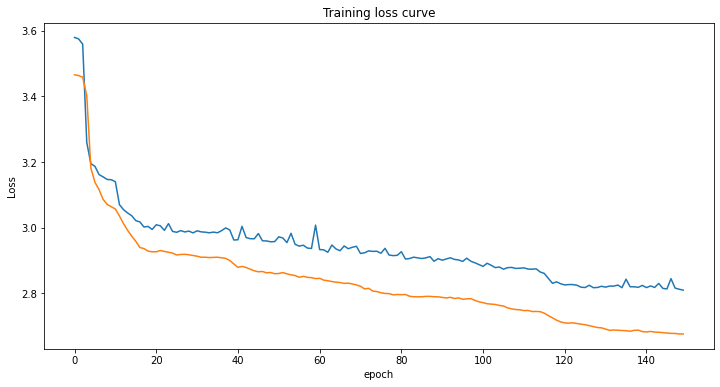

In [22]:
import matplotlib.pyplot as plt
# training_total_loss = [ i.detach().numpy() for i in training_all_loss]
plt.figure(figsize = (12,6))
plt.plot(range(len(validation_all_loss)),validation_all_loss)

plt.plot(range(len(training_all_loss)),training_all_loss)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title('Training loss curve')
plt.show()


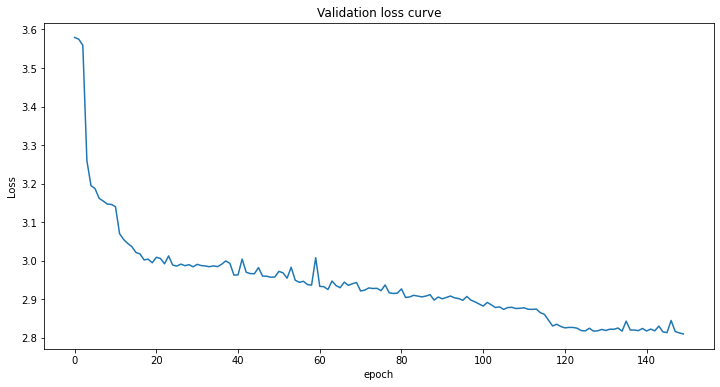

In [23]:
import matplotlib.pyplot as plt
# validation_total_loss = [ i.detach().numpy() for i in validation_all_loss]
plt.figure(figsize = (12,6))
plt.plot(range(len(validation_all_loss)),validation_all_loss)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title('Validation loss curve')
plt.show()

In [24]:

import torchvision.transforms as T

        
def calculate_metrics(model):

    cal_metrics=calculate()
    model.to(device)
#     print("here")
    with torch.set_grad_enabled(False):
        model.eval()
#         print("here1")
        count=0
        for batch,labels in train_gen:
    #             print("here2")
            count+=1
            batch=batch.float().to(device)
#             batch = F.normalize(batch,mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
            predictions=model(batch)
            predicted_masks=torch.argmax(predictions,dim=1).type(torch.float)
            labels = labels.squeeze(1).to(device)
            cal_metrics.add(predicted_masks.cpu(),labels.cpu()) 
        print("Training set: miou,maccuracy,accuracy: ",cal_metrics.calculate_accuracy())

    cal_metrics_=calculate()
    with torch.set_grad_enabled(False):
        model.eval()
#         print("here1")
        count=0
        for batch,labels in test_gen:
    #             print("here2")
            count+=1
            batch=batch.float().to(device)
#             batch = F.normalize(batch,mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
            predictions=model(batch)
            predicted_masks=torch.argmax(predictions,dim=1).type(torch.float)
            labels = labels.squeeze(1).to(device)
            cal_metrics_.add(predicted_masks.cpu(),labels.cpu()) 
        print("Testing set: miou,maccuracy,accuracy: ",cal_metrics_.calculate_accuracy())

calculate_metrics(model)

Training set: miou,maccuracy,accuracy:  (0.47516143849561615, 0.47516143849561615, 0.8427635118799303)
Testing set: miou,maccuracy,accuracy:  (0.41360390064363706, 0.41360390064363706, 0.7952462901239807)


In [ ]:
import torchvision.transforms.functional as F

testing_total_loss=0
testing_loss=0
model.to(device)
model.eval()
print("here")
with torch.set_grad_enabled(False):
    print("here1")
    for batch,labels in test_gen:
#             print("here2")
        batch=batch.float().to(device)
        labels=labels.float()
#         labels = ((labels - labels.min()) * (1/(labels.max() - labels.min())*30))
#         print("batch size", batch.size())
#             batch,label=Variable(batch,requires_grad=True),Variable(labels,requires_grad=True)
#             print(batch,label)
        predictions=model(batch)
#             print("predictions" ,predictions)
#             print("predictions size",predictions.size())
#             print("norm_pred",norm_pred.size())
#         npred = torch.argmax(predictions.squeeze(),dim=1)
        predictions = predictions.type(torch.FloatTensor)
        npred = torch.nn.functional.softmax(predictions,dim =1).to(device)
        print("np ", npred.size())
        labels = labels.squeeze(1).to(device)

        pred_loss = lossfunc(npred,labels.long()) 
#         testing_loss.append(pred_loss)
        print("pred_loss",pred_loss)
#         print("batch[0]",batch[0])
        masks = [
            npred[img_idx,sem_class_to_idx[cls]]
            for img_idx in range(batch.shape[0])
            for cls in classes]
        break

In [ ]:

import matplotlib.pyplot as plt
def show(imgs,Image_number,number):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0,i].set_title("image number: "+str(Image_number)+"mask: "+str(number))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
Image_num = 0
num = 0        
for mask in masks:
    if num>30:
        num = 0
        Image_num +=1
#     print(i)
    show(mask,Image_num,num)
    num+=1
    
# show(masks)

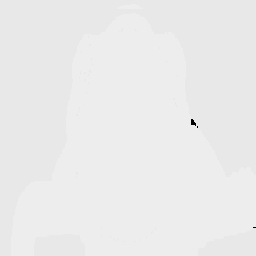

In [27]:
import torchvision.transforms as T

transform = T.ToPILImage()
image = transform(labels[15].float())
image